In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

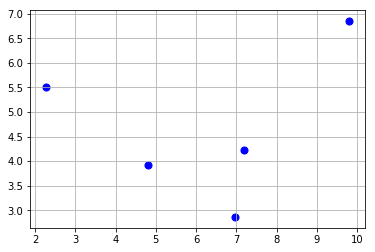

          점0        점1        점2        점3        점4
점0  0.000000  5.393133  1.388848  4.896710  2.401826
점1  5.393133  0.000000  5.090279  7.656440  2.998344
점2  1.388848  5.090279  0.000000  3.698301  2.405416
점3  4.896710  7.656440  3.698301  0.000000  5.792346
점4  2.401826  2.998344  2.405416  5.792346  0.000000


In [4]:
np.random.seed(123) 

var = ['X', 'Y']
labels = ['점0', '점1', '점2', '점3', '점4']

X = np.random.random_sample([5, 2])*10
df = pd.DataFrame(X, columns=var, index=labels)

plt.scatter(X[:, 0], X[:,1], c='blue', marker='o', s=50) 
plt.grid(True)
plt.show()

distmatrix = pdist(df, metric='euclidean') 
row_dist = pd.DataFrame(squareform(distmatrix), columns = labels, index = labels)
print(row_dist)

In [10]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(distmatrix, method='complete')
# row_clusters = linkage(df.values, method='complete', metric='euclidean’)
df2 = pd.DataFrame(row_clusters, columns=['클러스터ID_1', '클러스터ID_2','거리', '클러스터 멤버수'],
                                          index=['클러스터 %d' %(i+1) for i in range(row_clusters.shape[0])])
                                          
print(df2)

        클러스터ID_1  클러스터ID_2        거리  클러스터 멤버수
클러스터 1       0.0       2.0  1.388848       2.0
클러스터 2       4.0       5.0  2.405416       3.0
클러스터 3       1.0       6.0  5.393133       4.0
클러스터 4       3.0       7.0  7.656440       5.0


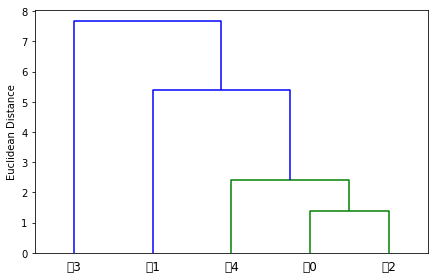

In [11]:
from scipy.cluster.hierarchy import dendrogram 
row_dendr = dendrogram(row_clusters, labels=labels)
plt.tight_layout() 
plt.ylabel('Euclidean Distance')
plt.show()